In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
from sklearn.datasets import fetch_20newsgroups

# Load dataset
dataset = fetch_20newsgroups(subset='all', shuffle=True, random_state=42)
documents = dataset.data


In [3]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Apply preprocessing to all documents
processed_docs = [preprocess_text(doc) for doc in documents]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
import gensim
from gensim import corpora

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)  # Reduced passes

# Print the topics discovered
topics = lda_model.print_topics()
for topic in topics:
    print(topic)


(0, '0.005*"government" + 0.005*"people" + 0.004*"israel" + 0.004*"one" + 0.004*"gun" + 0.003*"would" + 0.003*"said" + 0.003*"jews" + 0.003*"state" + 0.003*"us"')
(1, '0.014*"lines" + 0.013*"subject" + 0.013*"organization" + 0.007*"would" + 0.006*"university" + 0.006*"writes" + 0.005*"one" + 0.005*"article" + 0.005*"like" + 0.004*"get"')
(2, '0.017*"q" + 0.017*"p" + 0.017*"r" + 0.015*"g" + 0.014*"max" + 0.012*"n" + 0.011*"w" + 0.010*"b" + 0.010*"l" + 0.010*"h"')
(3, '0.013*"x" + 0.009*"file" + 0.007*"image" + 0.006*"windows" + 0.006*"use" + 0.006*"program" + 0.005*"files" + 0.005*"available" + 0.004*"software" + 0.004*"version"')
(4, '0.008*"would" + 0.007*"one" + 0.007*"writes" + 0.007*"subject" + 0.007*"people" + 0.006*"lines" + 0.006*"organization" + 0.006*"article" + 0.006*"god" + 0.005*"think"')


In [6]:
!pip install pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis

vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.2 MB/s eta 0:00:00


In [7]:
from gensim.models import Word2Vec

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)

# Get word vector for a specific word
vector = word2vec_model.wv['example']


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
from gensim.matutils import sparse2full

# Number of topics in the LDA model
num_topics = lda_model.num_topics

# Generate document vectors using LDA topic distributions
doc_vectors = [sparse2full(lda_model.get_document_topics(bow), num_topics) for bow in corpus]

# Compute cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate the cosine similarity matrix between document vectors
similarity_matrix = cosine_similarity(doc_vectors)

# Optionally print the similarity matrix
print(similarity_matrix)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[[1.0000001  0.15432698 0.22240663 ... 0.02165821 0.         0.12301526]
 [0.15432698 0.99999994 0.0428056  ... 0.98707885 0.98256147 0.97657526]
 [0.22240663 0.0428056  0.9999998  ... 0.00600733 0.         0.23748742]
 ...
 [0.02165821 0.98707885 0.00600733 ... 1.         0.9996595  0.97073376]
 [0.         0.98256147 0.         ... 0.9996595  1.         0.96740925]
 [0.12301526 0.97657526 0.23748742 ... 0.97073376 0.96740925 1.        ]]


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


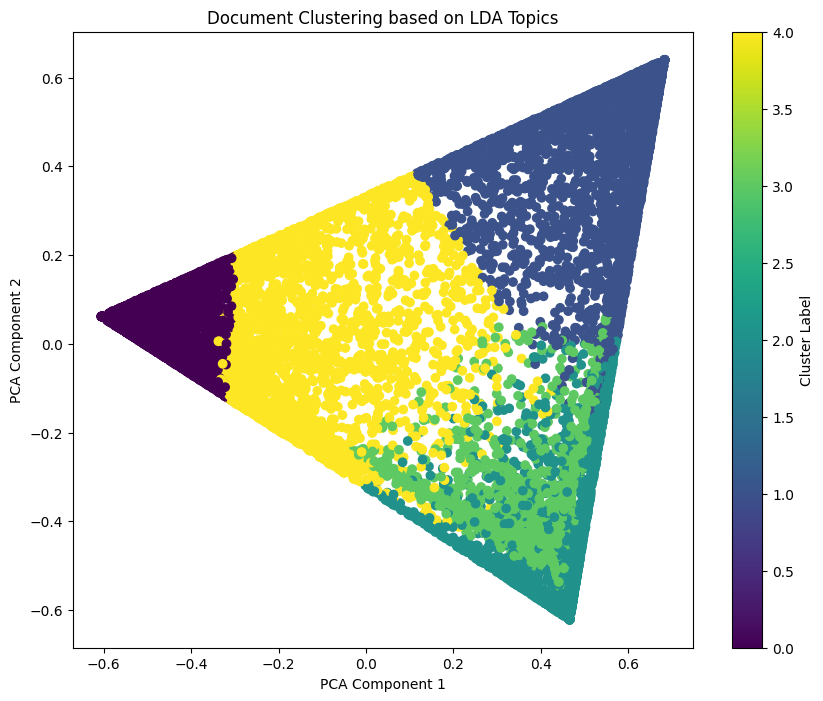

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import gensim
from gensim import corpora

# Assuming `processed_docs` and `lda_model` are already defined

# Create dictionary and corpus for LDA
dictionary = corpora.Dictionary(processed_docs)
corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

# Train LDA model
lda_model = gensim.models.LdaModel(corpus, num_topics=5, id2word=dictionary, passes=5)

# Generate document vectors using LDA topic distributions
num_topics = lda_model.num_topics
doc_vectors = [gensim.matutils.sparse2full(lda_model.get_document_topics(bow), num_topics) for bow in corpus]

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(doc_vectors)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
topic_vectors = pca.fit_transform(doc_vectors)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering based on LDA Topics')
plt.colorbar(label='Cluster Label')
plt.show()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


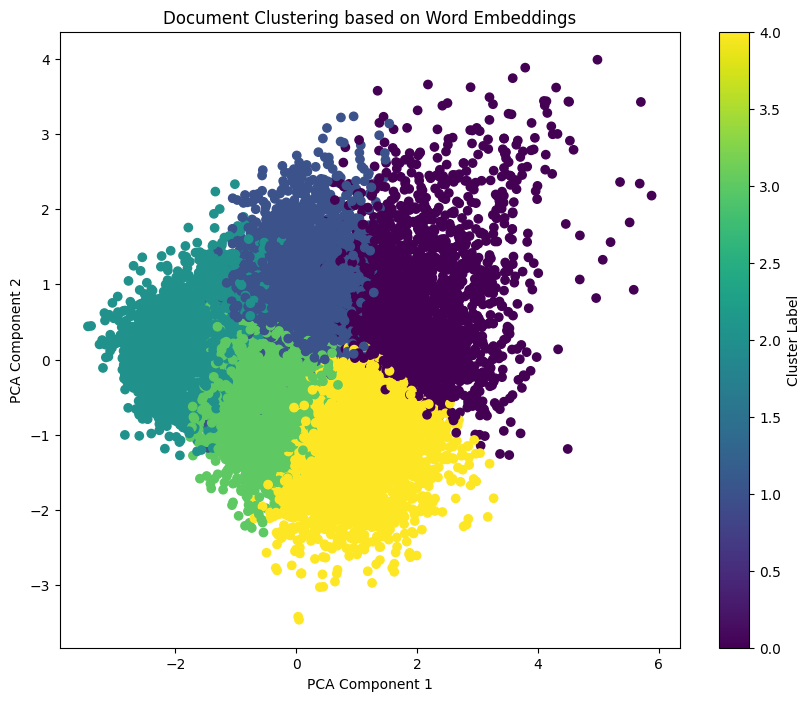

In [39]:
from gensim.models import Word2Vec
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Train Word2Vec model
word2vec_model = Word2Vec(sentences=processed_docs, vector_size=100, window=5, min_count=1, workers=4)

# Create document vectors by averaging word embeddings
def document_vector(doc):
    word_vectors = [word2vec_model.wv[word] for word in doc if word in word2vec_model.wv]
    if len(word_vectors) == 0:
        return np.zeros(word2vec_model.vector_size)
    return np.mean(word_vectors, axis=0)

doc_vectors = np.array([document_vector(doc) for doc in processed_docs])

# Perform KMeans clustering on the document vectors
num_clusters = 5
km = KMeans(n_clusters=num_clusters, random_state=0)
km.fit(doc_vectors)

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
topic_vectors = pca.fit_transform(doc_vectors)

# Visualize the clusters
plt.figure(figsize=(10, 8))
plt.scatter(topic_vectors[:, 0], topic_vectors[:, 1], c=km.labels_, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Document Clustering based on Word Embeddings')
plt.colorbar(label='Cluster Label')
plt.show()
